In [2]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [3]:
# Позволяет задать цвета
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

In [4]:
wine = load_wine()

In [5]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [6]:
# загружаем данные в датафрейм
data = pd.DataFrame(wine.data, columns=wine.feature_names)
data_class = wine.target

In [7]:
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [8]:
data_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [6]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.25)

In [7]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [8]:
# инициализируем класс модели
lda = LinearDiscriminantAnalysis()

In [9]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [10]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 0, 1, 0, 2, 0, 1, 2, 0, 2, 0, 2, 0, 1, 0, 1, 2, 0, 2, 1, 0, 0,
       1, 2, 1, 0, 1, 2, 1, 0, 2, 2, 1, 1, 2, 2, 2, 2, 0, 2, 1, 2, 1, 0,
       2])

In [11]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [12]:
result

,0,1
0,0,0
1,0,0
2,1,1
3,0,0
4,2,2
5,0,0
6,1,1
7,2,2
8,0,0
9,2,2


In [13]:
# расчет точности - отношение верный прогнозов к общему количеству позиций
# является хорошей метрикой для сбалансированных классов 
#(наблюдений в категориях примерно одинаковое количество)
# отношение правильных прогнозов от общего числа прогноза. % попадания точность модели
from sklearn.metrics import accuracy_score

In [14]:
accuracy_score(y_test, lda.predict(X_test))

0.9777777777777777

In [15]:
# коэффициенты дискриминатных линий
lda.coef_

array([[ 3.62474456e+00, -1.56725346e-01,  6.42866337e+00,
        -9.57352870e-01, -1.91326365e-02, -1.65997932e+00,
         5.32059449e+00,  1.85659811e+00, -1.63927834e+00,
        -1.09239823e+00,  1.78232000e+00,  3.48958822e+00,
         1.34471913e-02],
       [-2.27799907e+00, -1.08684330e+00, -6.45740197e+00,
         2.39374043e-01,  1.59537579e-02, -4.93308854e-02,
         1.50794246e+00,  1.06633314e+01,  9.55194546e-01,
        -7.58851759e-01,  1.14254448e+00,  3.48204050e-01,
        -6.12330638e-03],
       [-9.26337925e-01,  2.15143698e+00,  2.66283513e+00,
         8.89975181e-01, -2.11025597e-03,  2.37034221e+00,
        -1.00018399e+01, -2.15468815e+01,  5.52567435e-01,
         2.85375227e+00, -4.48584736e+00, -5.41842227e+00,
        -7.58274852e-03]])

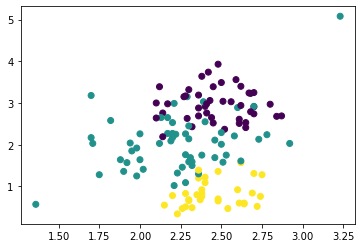

In [16]:
# визуализируем дискриминантную линию только по 2 признакам
plt.scatter(X_train['ash'], X_train['flavanoids'], c=y_train)
plt.show()

In [17]:
small_train = X_train[(y_train == 0) | (y_train == 2)]
small_train = small_train[['ash', 'flavanoids']]
sy_train = y_train[(y_train == 0) | (y_train == 2)]
small_test = X_test[(y_test == 0) | (y_test == 2)]
small_test = small_test[['ash', 'flavanoids']]
sy_test = y_test[(y_test == 0) | (y_test == 2)]

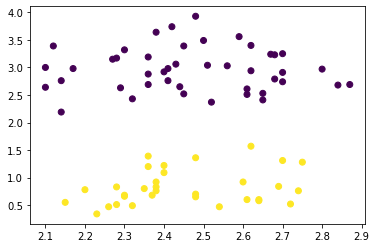

In [18]:
plt.scatter(small_train['ash'], small_train['flavanoids'], c=sy_train)
plt.show()

In [19]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, sy_train)

LinearDiscriminantAnalysis()

In [20]:
# посмотрим на наши центроиды
lda_small.means_

array([[2.46954545, 2.96363636],
       [2.4496875 , 0.82375   ]])

C:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


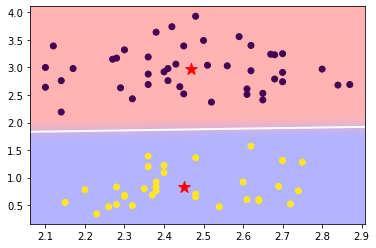

In [21]:
# сам scatter plot
plt.scatter(small_train['ash'], small_train['flavanoids'], c=sy_train)
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку" - раскрашивается, две части разделены линией нашей, которая отделеяет четко 0 группу от 2
# как было сказано ранее, линия строится таким образом, чтобы центры групп были максимально отдалены друг от дргуа
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1)

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

In [ ]:
# по Y зала, по х Flavanoids
# Зала является главным признаком. Нет 0 группы с высокми показателем залы, и 2 группы с низким показателем золы
# Наклон очень маленький, значит второй признак практически не важен 

In [22]:
# второй признак в 17 раз важнее первого для кластеризации (это видно по визуализации) (-16.21)
#это коеффициент дискрименатной линии (белой)
lda_small.coef_

array([[  1.71845536, -16.21148437]])

In [23]:
# какая будет точность? на двух признаках и группах
accuracy_score(sy_test, lda_small.predict(small_test))

1.0

In [8]:
# можем проверить, что корреляция будет слабой 
data[["flavanoids", "ash"]].corr()

,flavanoids,ash
flavanoids,1.000000,0.115077
ash,0.115077,1.000000


In [24]:
# заменим модель на логистическую регресиию
#модель тоже решает задачу классификацию
# кому интересно, отличия логистической регресссии от LDA: 
# https://www.introspective-mode.org/logistic-regression-or-discriminant-function-analysis/
# Основные моменты:
# LR может работать с категориальными признаками 
# зависимая пееременная в LR подчиняется логистической функции (изменяется от 0 до 1) и непрерывна
from sklearn.linear_model import LogisticRegression

In [25]:
#инициализируем класс
lr = LogisticRegression()

In [26]:
# обучаем модель
lr.fit(small_train, sy_train)

LogisticRegression()

In [27]:
# делаем прогноз и получаем модель прогноза
lr.predict(small_test)

array([0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 0, 2])

In [28]:
accuracy_score(sy_test, lr.predict(small_test)) # получаем точность 

1.0

In [29]:
lr.coef_ # второй признак так же важнее как и  в первом варианте, так как данные одни

array([[ 0.07511345, -3.10961573]])

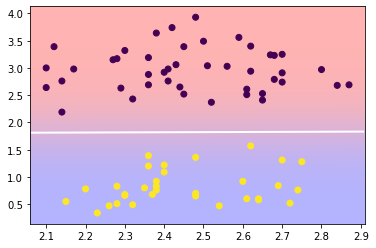

In [30]:
plt.scatter(small_train['ash'], small_train['flavanoids'], c=sy_train)

nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
Z = lr.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

plt.show()

## Кластеризация

In [2]:
# генерируем искусвтенные данные для примера. Случайные данные, случайные кластера

from sklearn.datasets import make_moons, make_blobs

In [3]:
# 200 точек с 2 центрами, СКО - 2.5 (стандартным отклонением)
X, y = make_blobs(n_samples=200, centers=2, cluster_std=2.5)

In [7]:
X

array([[-5.41929181, -0.59259987],
       [ 1.6991122 ,  1.00632343],
       [-1.01730189,  5.85439693],
       [ 7.9067782 ,  0.53954881],
       [ 1.89244098,  0.34001409],
       [ 8.39276225,  1.62258678],
       [-1.07158152, -0.20974814],
       [ 2.53093073,  3.21043016],
       [-1.7137081 ,  3.73808115],
       [ 4.25555668,  1.67217425],
       [ 2.94003726,  2.40479659],
       [ 8.41398518,  5.91580974],
       [ 7.76756842,  0.20511492],
       [ 4.48475505,  3.13665364],
       [-1.39970936,  4.95330239],
       [ 5.65215478,  4.90848053],
       [ 2.78192276,  2.27023106],
       [ 2.3362551 ,  2.81493498],
       [ 7.19160979,  3.19685728],
       [ 2.67469016, -0.73328946],
       [ 6.31994825,  1.79775002],
       [ 1.42298742,  3.71135274],
       [ 7.18161811, -2.62531825],
       [ 6.69675578,  3.02537313],
       [-0.52915472, -3.79913557],
       [ 0.78469806,  3.28163876],
       [ 5.61768488,  2.31272781],
       [ 4.91603321, -2.64856219],
       [ 3.89946344,

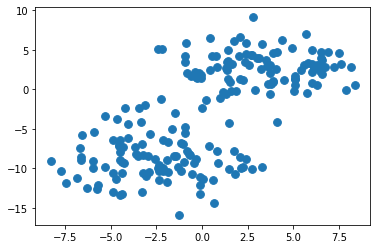

In [12]:
plt.scatter(X[:, 0], X[:, 1], cmap='autumn', s=60)

In [14]:
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

В реальных задачах при разделении выборки на train и test нужно обучать StandardScaler только на тренировочных данных (и применять уже к тестовым данным).


In [16]:
# fit-transform сразу обучается и преобразует данные
X_scaled = scaler.fit_transform(X)

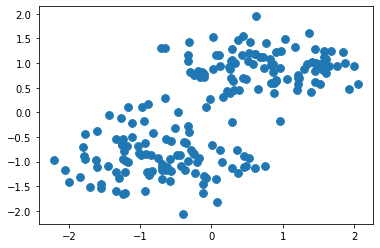

In [17]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', s=60)
# визуализация почти такая же, только изменился масштаб, модель сгадилась 

In [39]:
from sklearn.cluster import KMeans

In [40]:
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=2)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled) #нет правльных ответов, поэтому нет тестовых значаний, сразу не всех
clusters

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1])

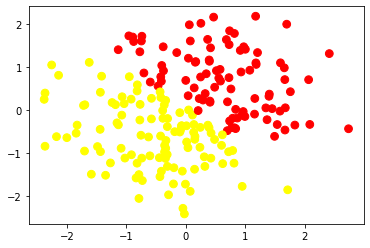

In [41]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)
# добавляем c=clusters это для будет переменная с кластерами наших данных

In [42]:
# строим график локтя. Определения кол-ва кластеров 

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k) # для каждой применяю метод каминс
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled) # для каждой делаю прогноз
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

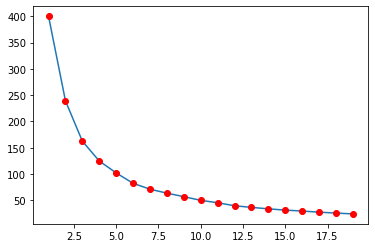

In [43]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')
# y инерция по x кол-во кластеров

Иерархическая кластеризация

In [44]:
from scipy.spatial.distance import pdist # pdist подсчет расстояния 
from scipy.cluster import hierarchy # иерархия

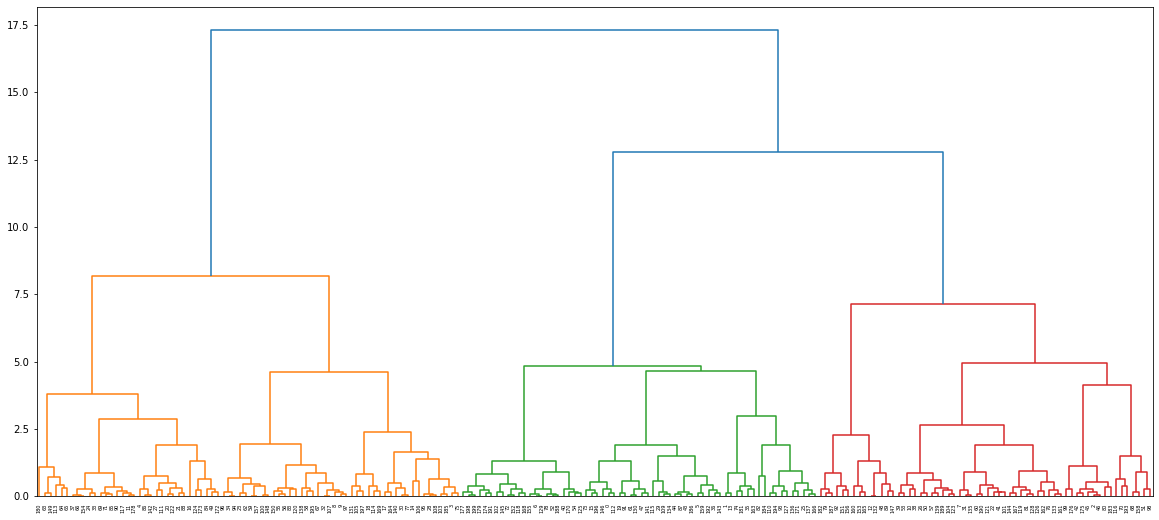

In [49]:
# строим дендрограмму
distance_mat = pdist(X_scaled) # pdist посчитает нам матрицу попарных расстояний между точками
# Z = hierarchy.linkage(distance_mat) # linkage — реализация агломеративного алгоритма
Z = hierarchy.linkage(distance_mat, 'ward') # Метод Уорда, если убрать, то метод ближнего соседа используется
plt.figure(figsize=(20, 9))
dn = hierarchy.dendrogram(Z)

In [21]:
# делаем уже кластеризацию по факту
from sklearn.cluster import AgglomerativeClustering

In [22]:
aglo = AgglomerativeClustering(n_clusters=2)
clusters = aglo.fit_predict(X_scaled)
clusters
# получаем массив прогнозов

array([1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1], dtype=int64)

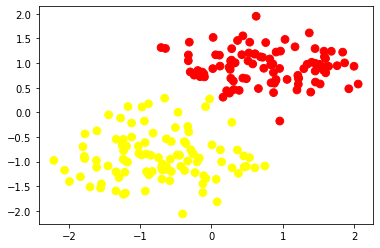

In [23]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', c=clusters, s=60)
# на границах есть разница и будут давать разный результат. 

In [19]:
# закидываем в датафрейм, чтобы можно было использовать классы для анализа базовых статистик (ср, медиана и т.д)
df = pd.DataFrame(X)
df["y_hat"] = clusters
df

NameError: name 'clusters' is not defined